Loading and exploring our dataset

In [1]:
import pandas as pd
import numpy as np

zoo_data = pd.read_csv("C:/Users/Chantal Silva/OneDrive/Escritorio/Ironhack/Week_3/Day_3/Project1/zoo.csv")
class_data = pd.read_csv("C:/Users/Chantal Silva/OneDrive/Escritorio/Ironhack/Week_3/Day_3/Project1/class.csv")

In [2]:
print(zoo_data.head())
print(class_data.head())

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

In [3]:
print("\nShape:", zoo_data.shape)
print("\nShape:", class_data.shape)


Shape: (101, 18)

Shape: (7, 4)


In [4]:
print(zoo_data.info())
print(class_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
<class 'pandas.cor

Check for problems/issues

In [5]:
# Checking for missing values
print(zoo_data.isnull().sum())
print(class_data.isnull().sum())

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64
Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64


In [6]:
# Checking for duplicates (full rows)
print(zoo_data.duplicated().sum())
print(class_data.duplicated().sum())

0
0


In [7]:
# Checking for duplicates in key columns 
print(f"Duplicated animals (name): {zoo_data['animal_name'].duplicated()}")
print(f"Duplicated classes (Class_Number): {class_data['Class_Number'].duplicated()}")

Duplicated animals (name): 0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Name: animal_name, Length: 101, dtype: bool
Duplicated classes (Class_Number): 0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: Class_Number, dtype: bool


In [8]:
# Checking if columns are correctly typed 
print(zoo_data.dtypes)
print(class_data.dtypes)

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object
Class_Number                          int64
Number_Of_Animal_Species_In_Class     int64
Class_Type                           object
Animal_Names                         object
dtype: object


In [9]:
# Checking for unique values per column (helps identify which columns are likely categorical)
print(zoo_data.nunique())
print(class_data.nunique())

animal_name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
class_type       7
dtype: int64
Class_Number                         7
Number_Of_Animal_Species_In_Class    7
Class_Type                           7
Animal_Names                         7
dtype: int64


In [10]:
# Checking for invalid or extreme values
print(zoo_data.describe(include="all"))
print(class_data.describe(include="all"))

       animal_name        hair    feathers        eggs        milk  \
count          101  101.000000  101.000000  101.000000  101.000000   
unique         100         NaN         NaN         NaN         NaN   
top           frog         NaN         NaN         NaN         NaN   
freq             2         NaN         NaN         NaN         NaN   
mean           NaN    0.425743    0.198020    0.584158    0.405941   
std            NaN    0.496921    0.400495    0.495325    0.493522   
min            NaN    0.000000    0.000000    0.000000    0.000000   
25%            NaN    0.000000    0.000000    0.000000    0.000000   
50%            NaN    0.000000    0.000000    1.000000    0.000000   
75%            NaN    1.000000    0.000000    1.000000    1.000000   
max            NaN    1.000000    1.000000    1.000000    1.000000   

          airborne     aquatic    predator     toothed    backbone  \
count   101.000000  101.000000  101.000000  101.000000  101.000000   
unique         NaN 

Starting the cleaning process

In [11]:
# Zoo_data cleaning
zoo_clean = zoo_data.copy()

# Defining index
zoo_clean = zoo_clean.set_index('animal_name')

# Class_data cleaning  
class_clean = class_data.copy()

Handling missing values

Handling duplicates

Since all data types are correct, there is no need to convert column types

In [15]:
# We are going to merge zoo_data with class_data
df_complete = zoo_data.merge(class_data, 
                            left_on='class_type', 
                            right_on='Class_Number', 
                            how='left')

print("Dataset merged:")
print(df_complete.shape)
print(df_complete.columns.tolist())

Dataset merged:
(101, 22)
['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type', 'Class_Number', 'Number_Of_Animal_Species_In_Class', 'Class_Type', 'Animal_Names']


In [16]:
df_complete.to_csv("zoo_dataset_complete.csv", index=True)

EDA

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv("C:/Users/Chantal Silva/OneDrive\Escritorio\Ironhack\Week_3\Day_3\zoo_dataset_complete.csv")

In [19]:
df.head()

,Unnamed: 0,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [27]:
# Redefining 'Animal_name' as Index
if 'animal_name' in df_complete.columns:
    df_complete = df_complete.set_index('animal_name')
    print(" Redefined Index to animal_name!")
    
print(f" New Index: {df_complete.index.name}")

 Redefined Index to animal_name!
 New Index: animal_name


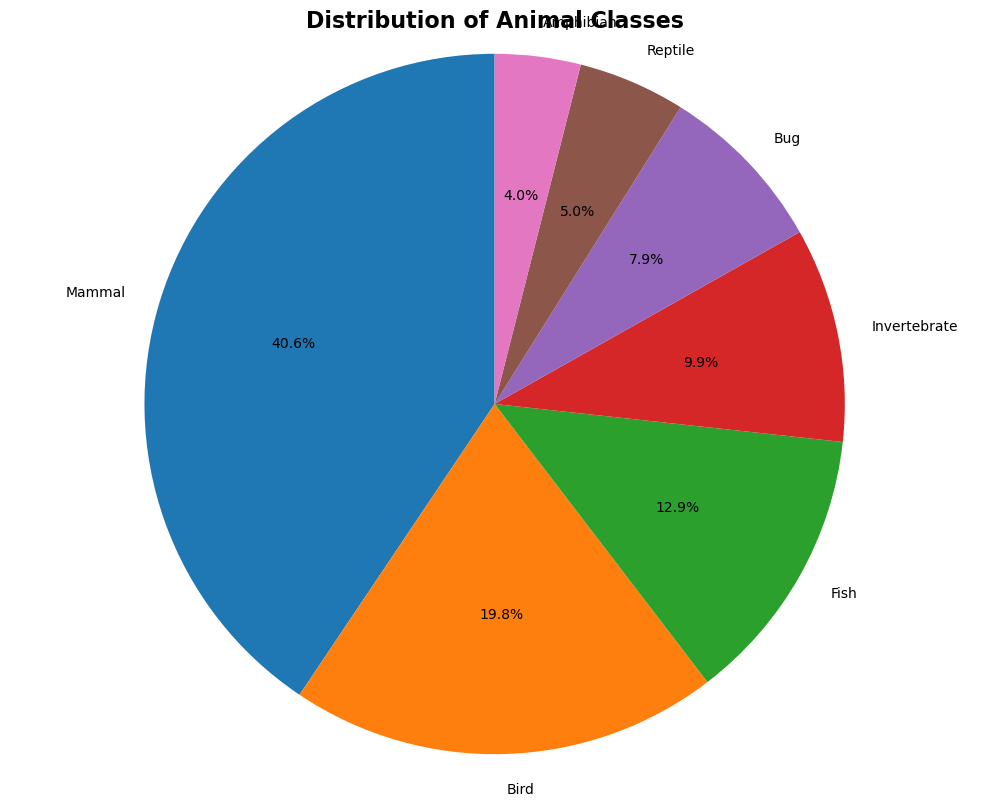

In [61]:
# Pie Chart - Animal Classes Distribution
plt.figure(figsize=(10, 8))
class_counts = df['Class_Type'].value_counts()
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Animal Classes', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.savefig('animal_classes_pie.png', dpi=300, bbox_inches='tight')
plt.show()

Identifying the variable types

In [28]:
# Numerical Variables
numerical_vars = df_complete.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f" Numerical Variables ({len(numerical_vars)}):")
print(numerical_vars)

# Categorical Variables  
categorical_vars = df_complete.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\n Categorical Variables   ({len(categorical_vars)}):")
print(categorical_vars)

# Index Variable
print(f"\n INDEX: {df_complete.index.name}")

 Numerical Variables (19):
['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type', 'Class_Number', 'Number_Of_Animal_Species_In_Class']

 Categorical Variables   (2):
['Class_Type', 'Animal_Names']

 INDEX: animal_name


In [32]:
num

,Unnamed: 0,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1,41
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1,41
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4,13
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1,41
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1,41
97,97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,6,8
98,98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1,41
99,99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,7,10


In [33]:
cat

,animal_name,Class_Type,Animal_Names
0,aardvark,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...
96,wallaby,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
99,worm,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [34]:
num.describe()

,Unnamed: 0,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,50.000000,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683,2.831683,24.306931
std,29.300171,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709,2.102709,14.541487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,2.000000,20.000000
75%,75.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000,4.000000,41.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000,7.000000,41.000000


In [36]:
round(num.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,101.0,50.00,29.30,0.0,25.0,50.0,75.0,100.0
hair,101.0,0.43,0.50,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.20,0.40,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.58,0.50,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.41,0.49,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.24,0.43,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.36,0.48,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.55,0.50,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.82,0.38,0.0,1.0,1.0,1.0,1.0


STEP 1

===  UNIVARIATE ANALYSIS - FEATHERS ===
QUESTION: How many animals have feathers?

 COUNT:
feathers
0    81
1    20
Name: count, dtype: int64

 SUMMARY: 81 animals WITHOUT feathers vs 20 animals WITH feathers


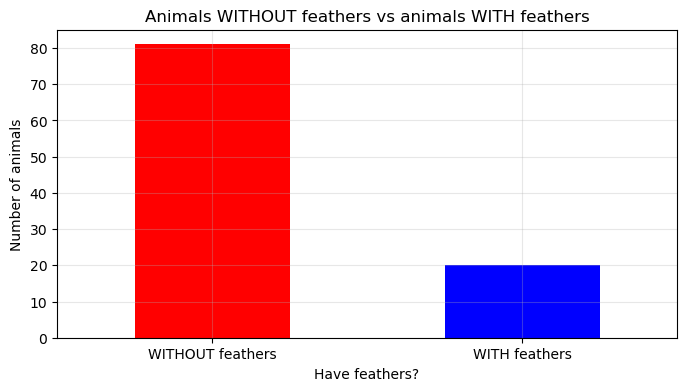

In [37]:
# STEP 1: How many animals have feathers?
print("===  UNIVARIATE ANALYSIS - FEATHERS ===")
print("QUESTION: How many animals have feathers?\n")

# Count of animals WITH and WITHOUT feathers
feathers_count = df_complete['feathers'].value_counts()
print(" COUNT:")
print(feathers_count)
print(f"\n SUMMARY: {feathers_count[0]} animals WITHOUT feathers vs {feathers_count[1]} animals WITH feathers")

# Graph
plt.figure(figsize=(8, 4))
df_complete['feathers'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Animals WITHOUT feathers vs animals WITH feathers')
plt.xlabel('Have feathers?')
plt.ylabel('Number of animals')
plt.xticks([0, 1], ['WITHOUT feathers', 'WITH feathers'], rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

STEP 2


===  UNIVARIATE ANALYSIS - PREDATORS ===
QUESTION: How many animals are predators?

 COUNT:
predator
1    56
0    45
Name: count, dtype: int64

 SUMMARY: 45 NON predators vs 56 PREDATORS


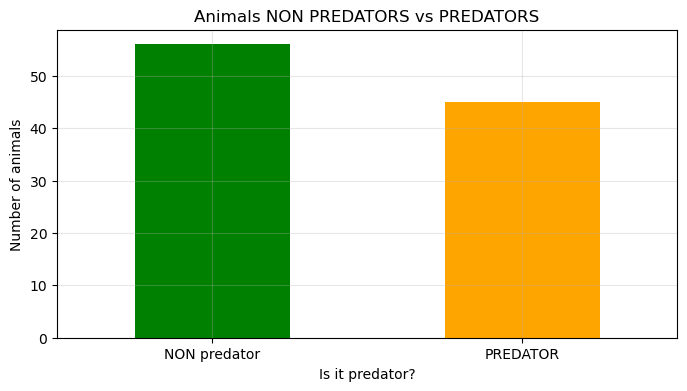

In [39]:
# STEP 2: How many animals are predators?
print("\n===  UNIVARIATE ANALYSIS - PREDATORS ===")
print("QUESTION: How many animals are predators?\n")

# Count of predators vs non predators
predators_count = df_complete['predator'].value_counts()
print(" COUNT:")
print(predators_count)
print(f"\n SUMMARY: {predators_count[0]} NON predators vs {predators_count[1]} PREDATORS")

# Graph
plt.figure(figsize=(8, 4))
df_complete['predator'].value_counts().plot(kind='bar', color=['green', 'orange'])
plt.title('Animals NON PREDATORS vs PREDATORS')
plt.xlabel('Is it predator?')
plt.ylabel('Number of animals')
plt.xticks([0, 1], ['NON predator', 'PREDATOR'], rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

STEP 3


===  BIVARIATE ANALYSIS - FEATHERS vs PREDATORS ===
QUESTION: Are feathered animals more predatory?

 FEATHERS vs PREDATORS TABLE:
predator   0   1
feathers        
0         34  47
1         11   9

 LEGEND:
- Rows: 0 = WITHOUT feathers, 1 = WITH feathers
- Columns: 0 = NON predator, 1 = PREDATOR


<Figure size 1000x600 with 0 Axes>

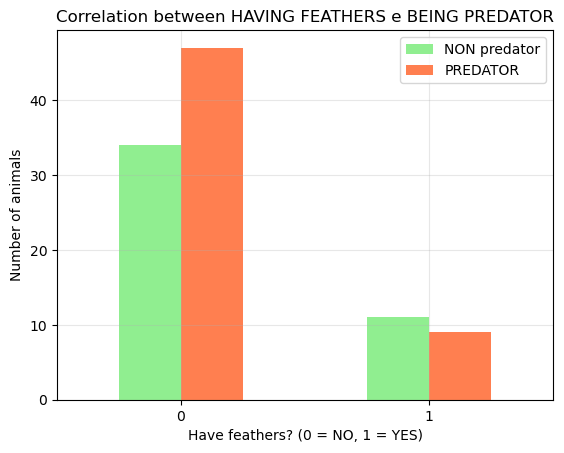

In [40]:
# STEP 3: Is there a relationship between having feathers and being a predator?
print("\n===  BIVARIATE ANALYSIS - FEATHERS vs PREDATORS ===")
print("QUESTION: Are feathered animals more predatory?\n")

# Frequency table showing the two variables together
table = pd.crosstab(df_complete['feathers'], df_complete['predator'])
print(" FEATHERS vs PREDATORS TABLE:")
print(table)
print("\n LEGEND:")
print("- Rows: 0 = WITHOUT feathers, 1 = WITH feathers")
print("- Columns: 0 = NON predator, 1 = PREDATOR")

# Graph showing the two variables together
plt.figure(figsize=(10, 6))
table.plot(kind='bar', color=['lightgreen', 'coral'])
plt.title('Relationship between HAVING FEATHERS e BEING PREDATOR')
plt.xlabel('Have feathers? (0 = NO, 1 = YES)')
plt.ylabel('Number of animals')
plt.legend(['NON predator', 'PREDATOR'])
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

In [47]:
# Relationship calculation (number that measures the relationship)
relationship = df_complete['feathers'].corr(df_complete['predator'])
print(f"\n RELATIONSHIP: {relationship:.3f}")


 RELATIONSHIP: -0.104


In [48]:
# Interpretation
print("\n INTERPRETATION:")
if relationship > 0.1:
    print(" Animals WITH feathers tend to BE predators")
elif relationship < -0.1:
    print(" Animals WITH feathers tend NOT TO BE predators")
else:
    print(" There is no strong relationship between having feathers and being a predator")


 INTERPRETATION:
 Animals WITH feathers tend NOT TO BE predators


STEP 4

In [59]:
# STEP 4: More detailed analysis
print("\n===  DETAILED ANALYSIS ===")

# Percentages
table_percent = pd.crosstab(df_complete['feathers'], df_complete['predator'], normalize='index') * 100
print(" PERCENTAGES (by having or not feathers):")
print(round(table_percent, 1))
print("\n EXAMPLE: Of animals WITH feathers, X% are predators.")

# Statistics per group
print(f"\n STATISTICS:")
print(f"- Animals WITHOUT feathers: {feathers_count[0]} total")
print(f"- Animals WITH feathers: {feathers_count[1]} total")
print(f"- Percentage of predators among animals WITHOUT feathers: {(table.loc[0,1]/table.loc[0].sum()*100):.1f}%")
print(f"- Percentage of predators among animals WITH feathers: {(table.loc[1,1]/table.loc[1].sum()*100):.1f}%")


===  DETAILED ANALYSIS ===
 PERCENTAGES (by having or not feathers):
predator     0     1
feathers            
0         42.0  58.0
1         55.0  45.0

 EXAMPLE: Of animals WITH feathers, X% are predators.

 STATISTICS:
- Animals WITHOUT feathers: 81 total
- Animals WITH feathers: 20 total
- Percentage of predators among animals WITHOUT feathers: 58.0%
- Percentage of predators among animals WITH feathers: 45.0%


In [60]:
table = pd.crosstab(df_complete['feathers'], df_complete['predator'])

In [21]:
df.animal_name.value_counts().plot(kind="bar")

<Axes: xlabel='animal_name'>

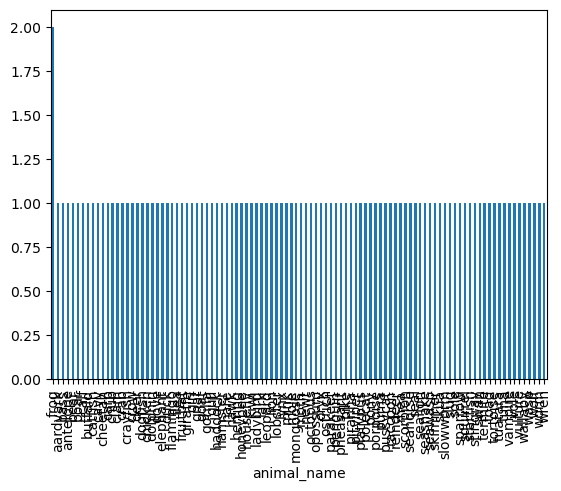

In [22]:
plt.show()

In [23]:
top_animals = df.animal_name.value_counts().head(10)

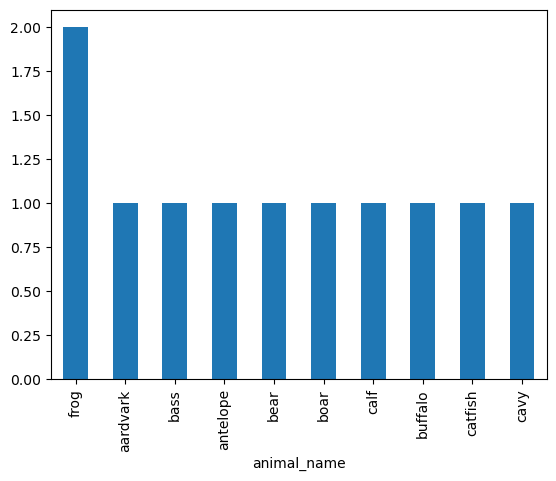

In [24]:
top_animals.plot(kind='bar')
plt.show()